In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
df=pd.read_csv("placement (1).csv")
df.head()
# so basically in this data set there are 1000 rows

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [106]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [107]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

Text(0.5, 1.0, 'placement_exam_marks kde')

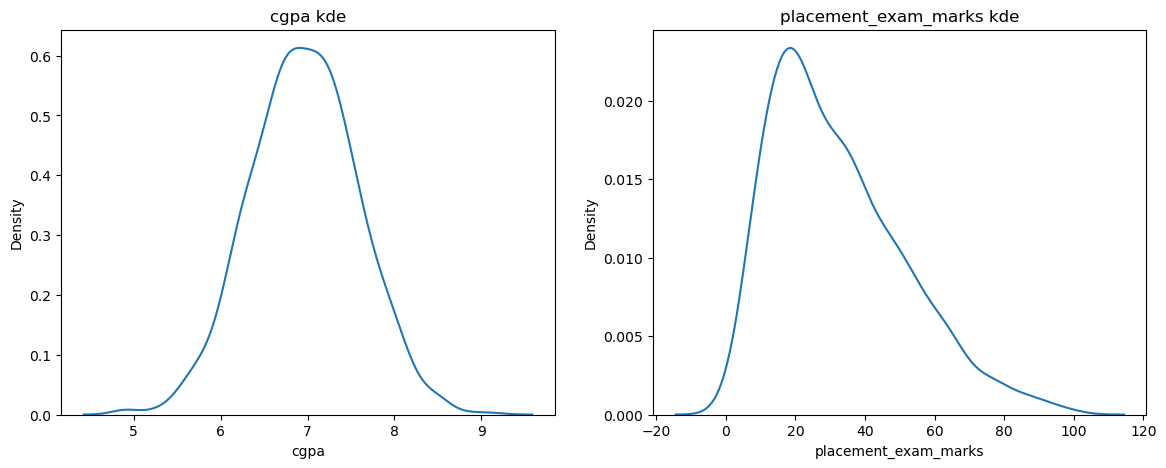

In [108]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.kdeplot(df["cgpa"])
plt.title("cgpa kde")

plt.subplot(122)
sns.kdeplot(df["placement_exam_marks"])
plt.title("placement_exam_marks kde")

<Axes: ylabel='placement_exam_marks'>

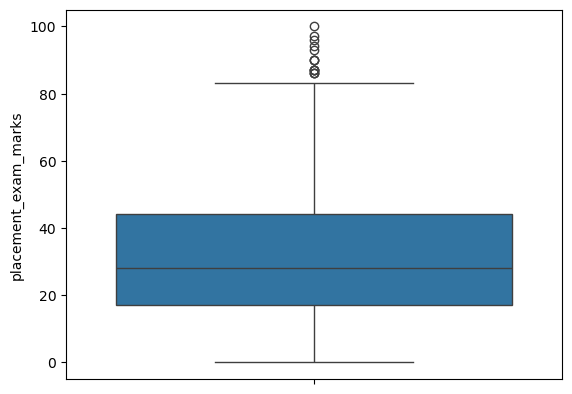

In [109]:
sns.boxplot(df["placement_exam_marks"])

- so basically we can apply this IQR technique for outliers detection on placement_exam_marks column beacuse it is skewed
- outlier detection using IQR is applied on skewed data

- now we will calculate all the things which are required for boxplot

In [110]:
percentile_25=df["placement_exam_marks"].quantile(0.25)
percentile_75=df["placement_exam_marks"].quantile(0.75)
# here we have calculate 25 and 50 th percentile for IQR

In [111]:
percentile_75

np.float64(44.0)

In [112]:
iqr=percentile_75-percentile_25

In [113]:
iqr

np.float64(27.0)

In [114]:
lower_limit=(percentile_25-(1.5*iqr))
upper_limit=(percentile_75+(1.5*iqr))

In [115]:
#outliers"]<upper_limit
df[df["placement_exam_marks"] > upper_limit]
# so in this data there are 15 outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# 1) Trimming 

In [116]:
new_df=df[df["placement_exam_marks"] <= upper_limit]

In [117]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


Text(0.5, 1.0, 'after removing outliers')

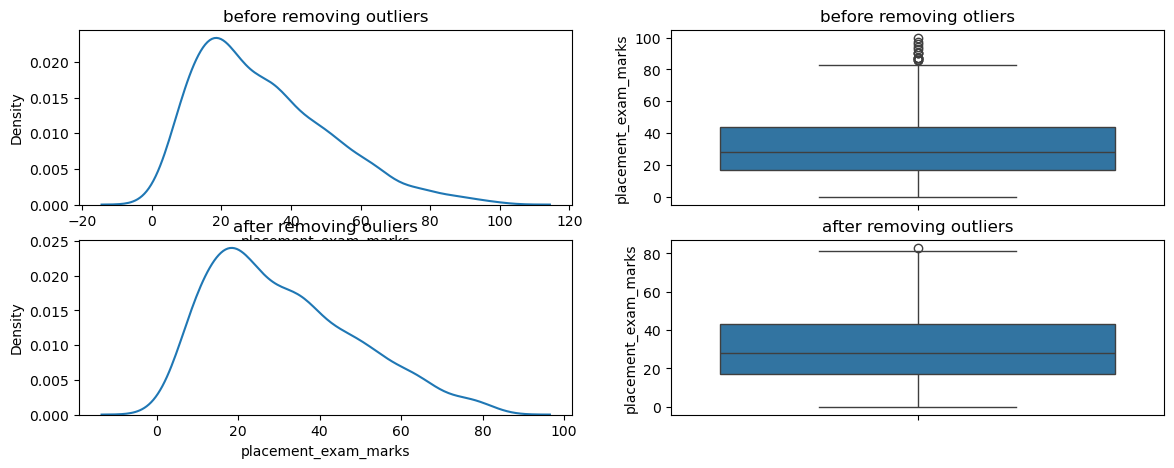

In [118]:
plt.figure(figsize=(14,5))
plt.subplot(221)
sns.kdeplot(df["placement_exam_marks"])
plt.title("before removing outliers")

plt.subplot(222)
sns.boxplot(df["placement_exam_marks"])
plt.title("before removing otliers")

plt.subplot(223)
sns.kdeplot(new_df["placement_exam_marks"])
plt.title("after removing ouliers")

plt.subplot(224)
sns.boxplot(new_df["placement_exam_marks"])
plt.title("after removing outliers")

# 2) capping

In [119]:
upper_limit

np.float64(84.5)

In [120]:
lower_limit

np.float64(-23.5)

In [121]:
new_df=df.copy()

In [122]:
new_df["placement_exam_marks"]=np.where(
    df["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(
        df["placement_exam_marks"] < lower_limit,
        lower_limit,
        df["placement_exam_marks"]
    )
)

Text(0.5, 1.0, 'after removing outliers')

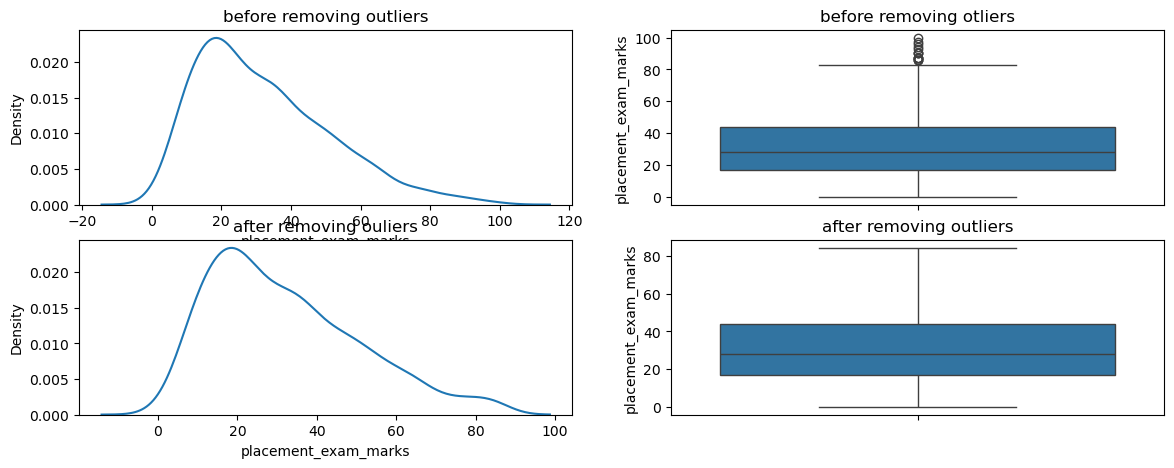

In [123]:
plt.figure(figsize=(14,5))
plt.subplot(221)
sns.kdeplot(df["placement_exam_marks"])
plt.title("before removing outliers")

plt.subplot(222)
sns.boxplot(df["placement_exam_marks"])
plt.title("before removing otliers")

plt.subplot(223)
sns.kdeplot(new_df["placement_exam_marks"])
plt.title("after removing ouliers")

plt.subplot(224)
sns.boxplot(new_df["placement_exam_marks"])
plt.title("after removing outliers")

- so basically with the help of IQR we can remove outliers or we can capping the outliers